In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv('../Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [41]:
df=df.drop("CustomerID",axis=1)

In [42]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


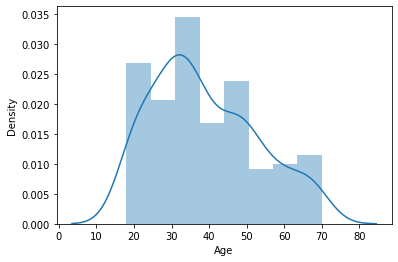

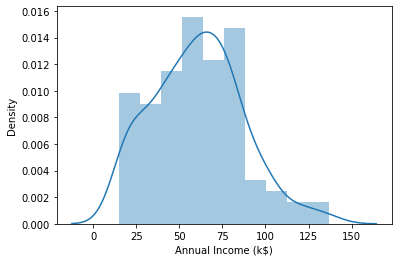

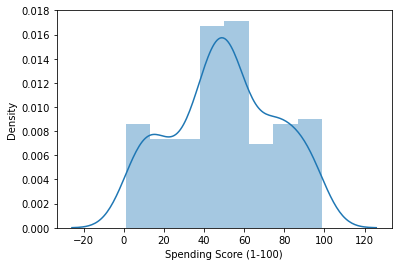

In [43]:
cols = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

for x in (cols):
    plt.figure()
    sns.distplot(df[x])

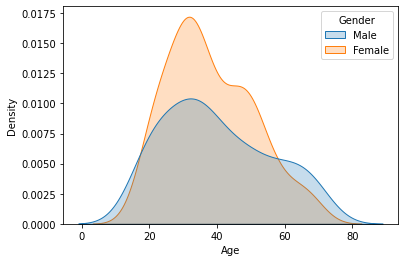

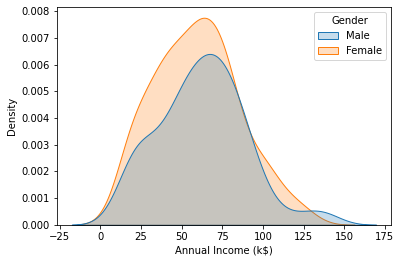

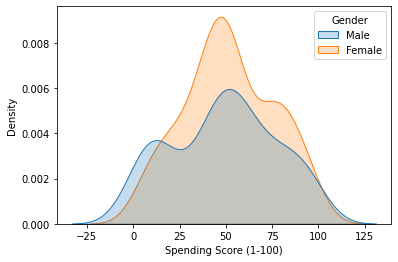

In [44]:
for x in (cols):
    plt.figure()
    sns.kdeplot(df[x],shade=True,hue=df["Gender"] )

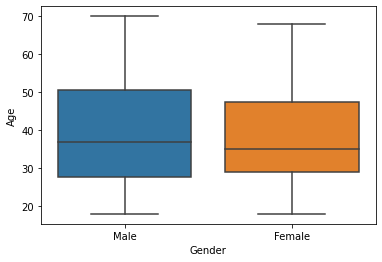

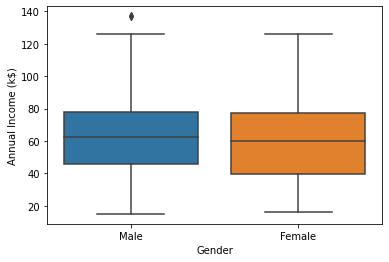

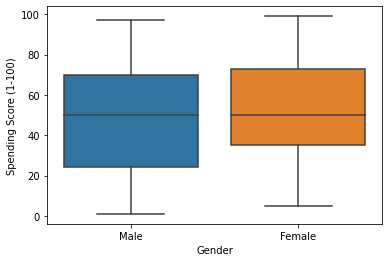

In [45]:
for i in (cols):
    plt.figure()
    sns.boxplot(data=df, x="Gender", y=i)

In [46]:
df["Gender"].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

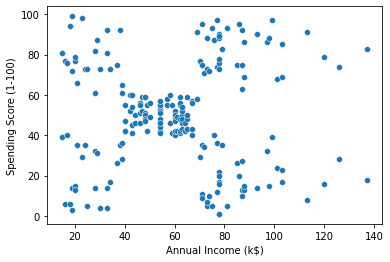

In [47]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)")

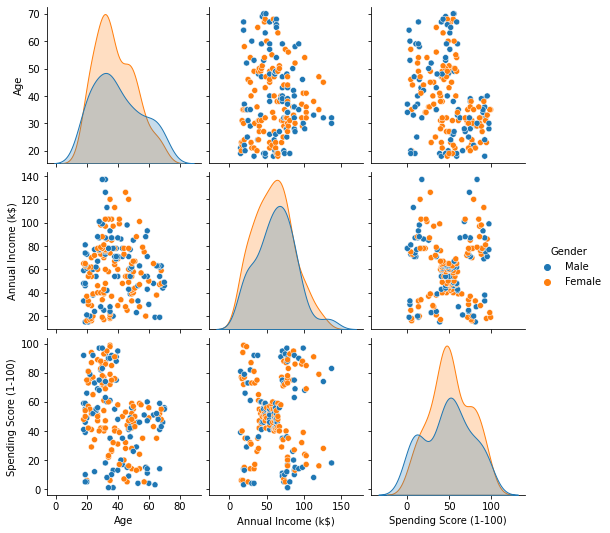

In [49]:
sns.pairplot(df, hue="Gender")

In [51]:
df.groupby(["Gender"])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


<AxesSubplot:>

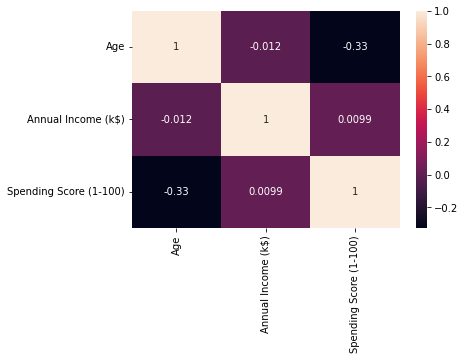

In [58]:
sns.heatmap(df.corr(),annot=True)

# Clustering

### Univariate

In [78]:
c1 = KMeans(n_clusters=3)

In [79]:
c1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [86]:
c1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [81]:
df['Income Cluster']=c1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [82]:
df['Income Cluster'].value_counts()

2    90
1    74
0    36
Name: Income Cluster, dtype: int64

In [83]:
c1.inertia_

23517.330930930937

In [76]:
inertia_scores=[]
for i in range(1,11):
    clustermodel = KMeans(n_clusters=i)
    clustermodel.fit(df[['Annual Income (k$)']])
    inertia_scores.append(clustermodel.inertia_)

inertia_scores

[137277.28,
 48660.88888888889,
 23517.330930930937,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3993.628787878788,
 2836.3399877899883,
 2267.6501891984863,
 1826.4469696969695]

In [ ]:
inertia_scores=[]
for i in range(1,11):
    clustermodel = KMeans(n_clusters=i)
    clustermodel.fit(df[['Annual Income (k$)']])
    inertia_scores.append(clustermodel.inertia_)

inertia_scores

[137277.28,
 48660.88888888889,
 23517.330930930937,
 13278.112713472485,
 8481.496190476191,
 5050.904761904762,
 3993.628787878788,
 2836.3399877899883,
 2267.6501891984863,
 1826.4469696969695]

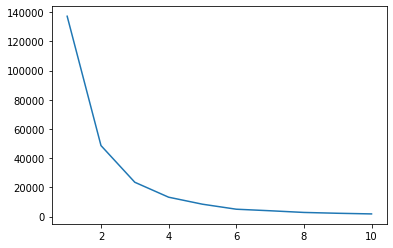

In [77]:
plt.plot(range(1,11),inertia_scores)

In [85]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


### Kmeans Bivariate 

In [96]:
c2 = KMeans(n_clusters=5)

In [97]:
c2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

KMeans(n_clusters=5)

In [98]:
c2.labels_

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3,
       0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 1, 4, 3, 4, 1, 4, 1, 4,
       3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [99]:
df['Income Cluster2']=c2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income Cluster2
0,Male,19,15,39,1,0
1,Male,21,15,81,1,2
2,Female,20,16,6,1,0
3,Female,23,16,77,1,2
4,Female,31,17,40,1,0


In [100]:
df['Income Cluster2'].value_counts()

3    81
4    39
1    35
0    23
2    22
Name: Income Cluster2, dtype: int64

In [101]:
c2.inertia_

44448.45544793371

In [94]:
inertia_scores=[]
for i in range(1,11):
    clustermodel = KMeans(n_clusters=i)
    clustermodel.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores.append(clustermodel.inertia_)

inertia_scores

[269981.28,
 183069.17582751293,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30241.343617936593,
 24986.52564064288,
 21830.041978049438,
 19657.783608703954]

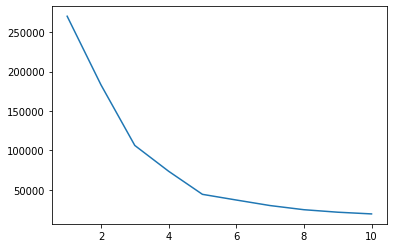

In [95]:
plt.plot(range(1,11),inertia_scores)

In [109]:
centers = pd.DataFrame(c2.cluster_centers_)
centers.columns = ['x','y']

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

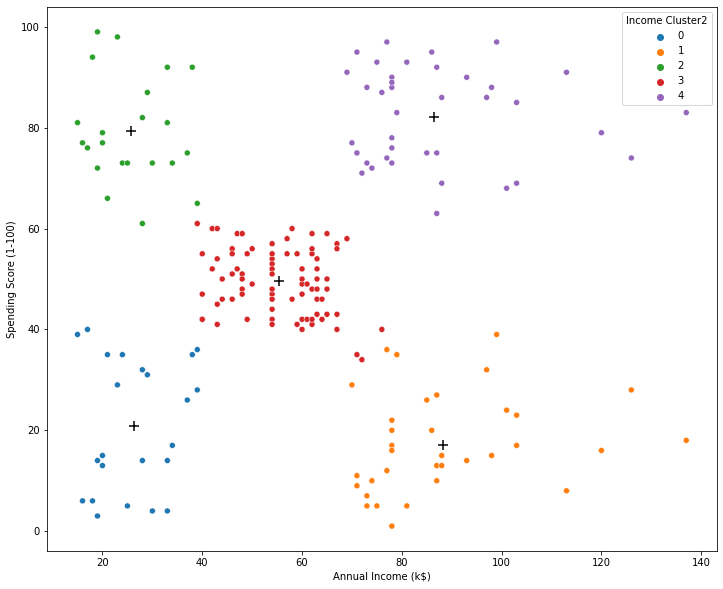

In [111]:
plt.figure(figsize=(12,10))
plt.scatter(x=centers['x'], y=centers['y'],s=100,c='black',marker='+')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue="Income Cluster2", palette='tab10')

In [114]:
pd.crosstab(df['Income Cluster2'],df['Gender'],normalize='index')

Gender,Female,Male
Income Cluster2,,
0,0.608696,0.391304
1,0.457143,0.542857
2,0.590909,0.409091
3,0.592593,0.407407
4,0.538462,0.461538


In [115]:
df.groupby('Income Cluster2')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster2,,,
0,45.217391,26.304348,20.913043
1,41.114286,88.200000,17.114286
2,25.272727,25.727273,79.363636
3,42.716049,55.296296,49.518519
4,32.692308,86.538462,82.128205


### Multivariate

In [116]:
from sklearn.preprocessing import StandardScaler

In [133]:
scaler = StandardScaler

In [134]:
dff=pd.get_dummies(df, drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Income Cluster2,Gender_Male
0,19,15,39,1,0,1
1,21,15,81,1,2,1
2,20,16,6,1,0,0
3,23,16,77,1,2,0
4,31,17,40,1,0,0


In [135]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Income Cluster2', 'Gender_Male'],
      dtype='object')

In [136]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]

scaler = StandardScaler()
dff_scaled = scaler.fit_transform(dff)

In [137]:
dff = pd.DataFrame(dff_scaled)

In [138]:
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [139]:
inertia_scores=[]
for i in range(1,11):
    clustermode3 = KMeans(n_clusters=i)
    clustermode3.fit(dff)
    inertia_scores.append(clustermode3.inertia_)

inertia_scores

[799.9999999999999,
 588.8026767824936,
 476.7875544135159,
 386.7147857740688,
 327.41319454631605,
 275.03067100144705,
 235.37792875035225,
 199.78478208926077,
 174.12493921599278,
 152.70574418500468]

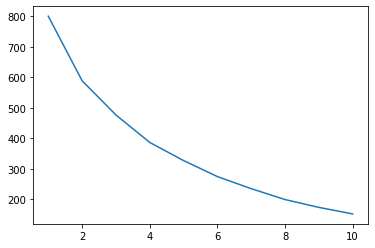

In [141]:
plt.plot(range(1,11),inertia_scores)